<a href="https://colab.research.google.com/github/rhanilham/PCVK/blob/main/Jobsheet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Gamma Correction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai gamma: 3


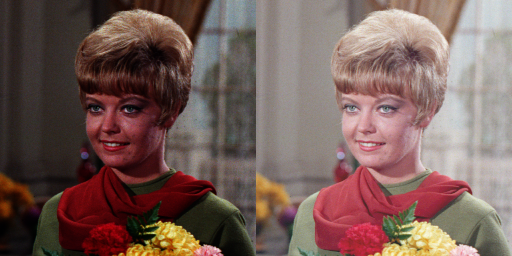

In [ ]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/images/female.tiff')
#gamma inverted
gamma = 1/gamma
gamma_corrected = np.array(255*(original / 255) ** gamma, dtype='uint8')
# gamma_corrected = np.array(255*(original / 255) ** gamma, dtype='uint8')

final_frame = cv.hconcat((original, gamma_corrected))
cv2_imshow(final_frame)

## 2. Image Depth

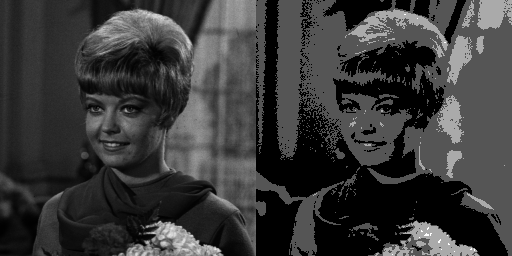

In [15]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)
for i in range(len(original)):
  for j in range(len(original[0])):
    depth_image[i][j] = np.round(original[i][j]/level)*level

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

## 3. Average Denoising

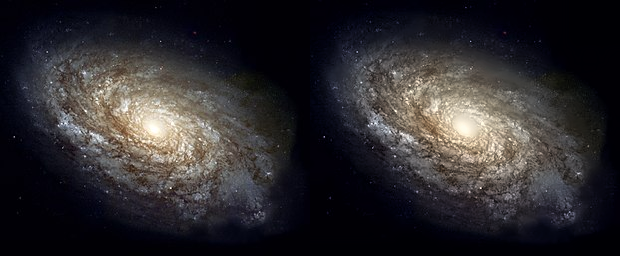

PSNR:  42.85416143448444


In [17]:
galaxy_original = cv.imread('/content/drive/MyDrive/PCVK/images/galaxy.jpg')
#denoising
galaxy_denoising = cv.fastNlMeansDenoisingColored(galaxy_original,None,3,3,7,21)
final_frame = cv.hconcat((galaxy_original, galaxy_denoising))
cv2_imshow(final_frame)
psnr = cv.PSNR(galaxy_original, galaxy_denoising)
print("PSNR: ", psnr)

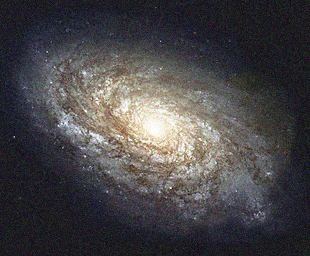

PSNR 5 images:  19.531640844021783


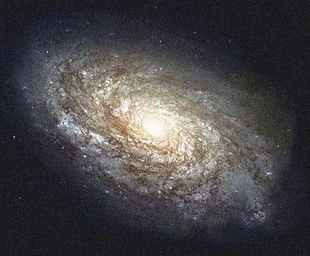

PSNR 10 images:  19.733172425058896


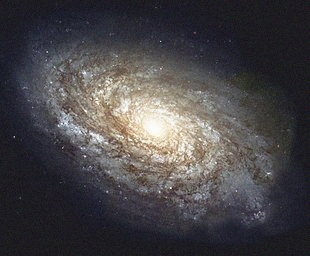

PSNR 20 images:  19.837937597419636


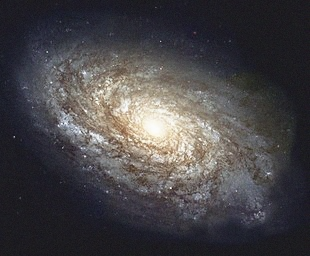

PSNR 40 images:  19.892766874601403


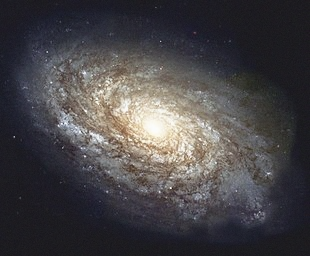

PSNR 80 images:  19.91643646301116


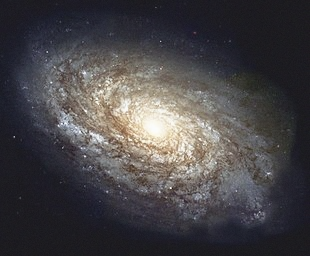

PSNR 100 images:  19.92196095594035


In [24]:
import glob
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

#average denoising using average of 5, 10, 20, 40, 80, 100 images
num_img = [5, 10, 20, 40, 80, 100]
avg = []
for i in num_img:
  sum = np.zeros((256, 310, 3), dtype=np.float64)
  for j in range(i):
    sum = sum + cv_img[j]
  avg.append(np.uint8(sum/i))
  cv2_imshow(np.uint8(sum/i))
  psnr = cv.PSNR(galaxy_original, np.uint8(sum/i))
  print("PSNR", i, "images: ", psnr)

## 4. Image Masking

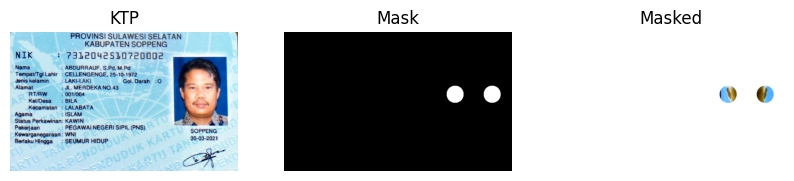

In [33]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/images/KTP/KTP7.jpeg')
mask = np.zeros(ktp.shape[:2], dtype="uint8")
mask = cv.circle(mask, (600,220), 30, 255, -1)
mask = cv.circle(mask, (730,220), 30, 255, -1)
masked = cv.bitwise_not(cv.bitwise_and(ktp, ktp, mask=mask))

mask = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)
masked = cv.cvtColor(masked, cv.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.subplot(131), plt.imshow(ktp[:,:,::-1]), plt.title('KTP')
plt.axis('off')
plt.subplot(132), plt.imshow(mask[:,:,::-1]), plt.title('Mask')
plt.axis('off')
plt.subplot(133), plt.imshow(masked[:,:,::-1]), plt.title('Masked')
plt.axis('off')
plt.show()

## 5. Others Operation

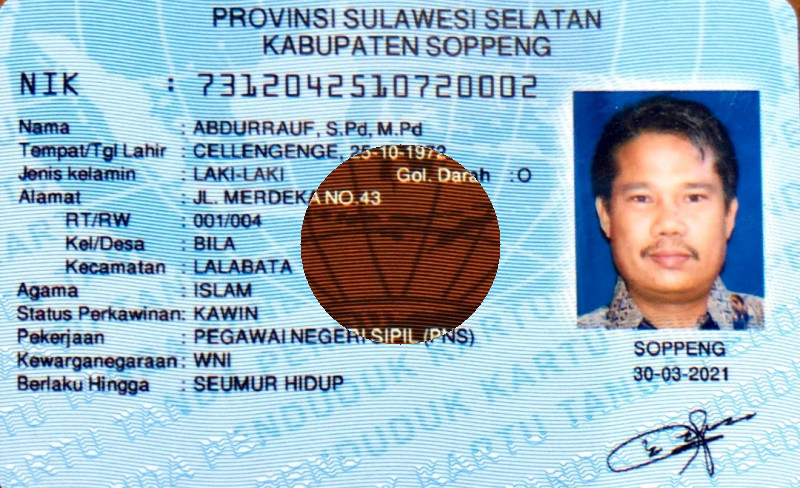

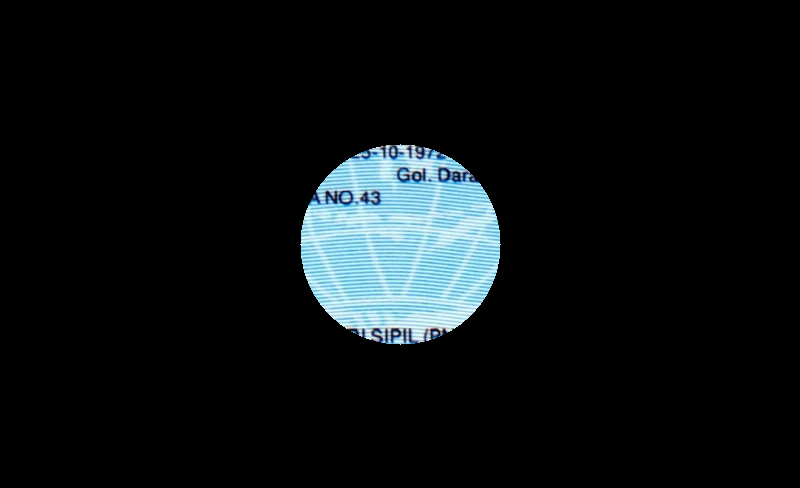

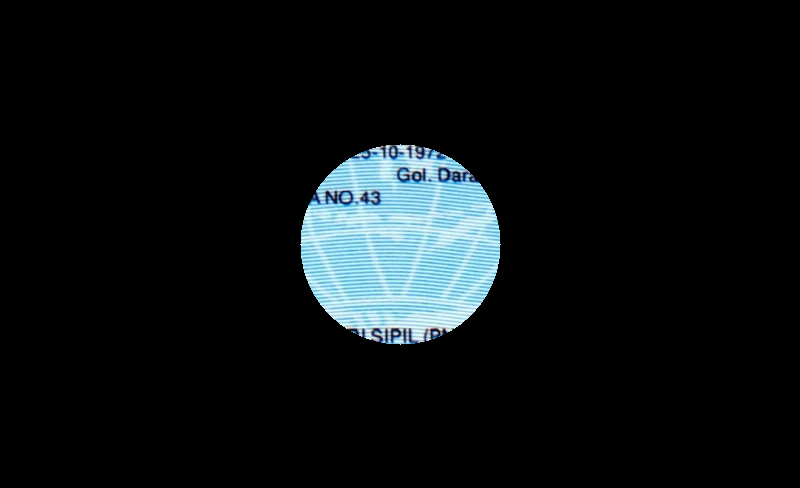

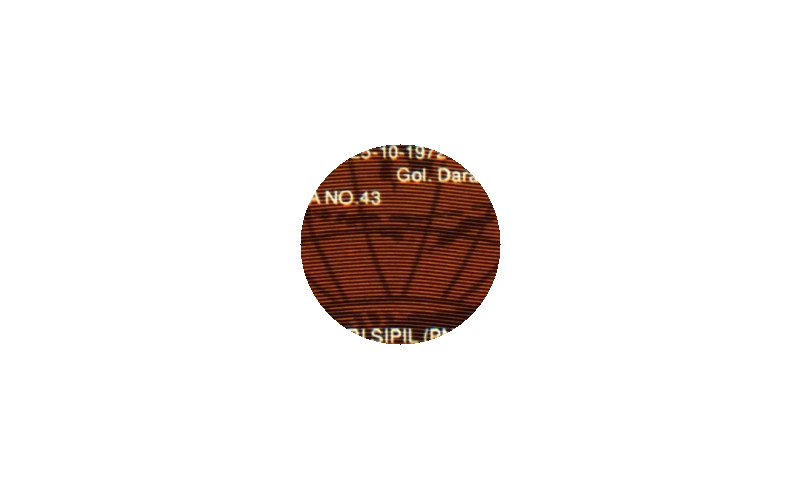

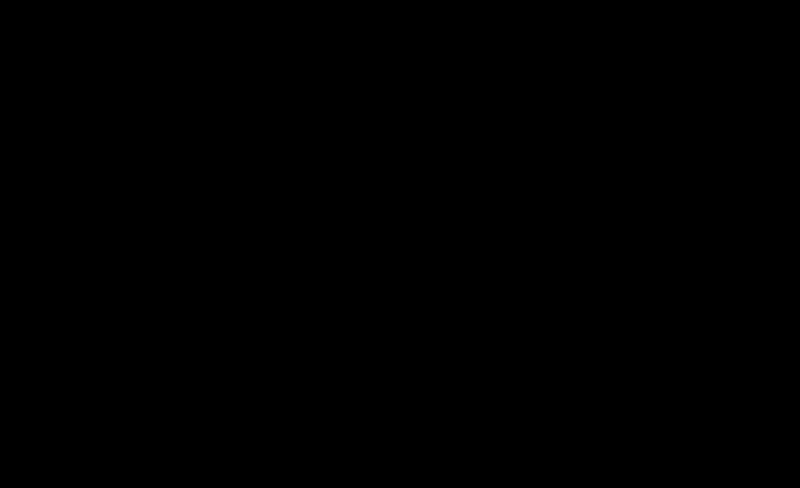

In [35]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/images/KTP/KTP7.jpeg')
mask = np.zeros(ktp.shape[:2], dtype="uint8")
mask = cv.circle(mask, (ktp.shape[1]//2, ktp.shape[0]//2), 100, 255, -1)
masked = cv.bitwise_xor(ktp, ktp, mask=mask)
masked = cv.cvtColor(masked, cv.COLOR_BGR2BGRA)

# test bitwise not
masked = cv.bitwise_not(ktp, ktp, mask=mask)
cv2_imshow(masked)

ktp = cv.imread('/content/drive/MyDrive/PCVK/images/KTP/KTP7.jpeg')
# test bitwise or
masked = cv.bitwise_or(ktp, ktp, mask=mask)
cv2_imshow(masked)

ktp = cv.imread('/content/drive/MyDrive/PCVK/images/KTP/KTP7.jpeg')
# test bitwise and
masked = cv.bitwise_and(ktp, ktp, mask=mask)
cv2_imshow(masked)

ktp = cv.imread('/content/drive/MyDrive/PCVK/images/KTP/KTP7.jpeg')
# test bitwise nand
masked = cv.bitwise_not(cv.bitwise_and(ktp, ktp, mask=mask))
cv2_imshow(masked)

ktp = cv.imread('/content/drive/MyDrive/PCVK/images/KTP/KTP7.jpeg')
# test bitwise xor
masked = cv.bitwise_xor(ktp, ktp, mask=mask)
cv2_imshow(masked)